In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
insurance = pd.read_csv("/content/sample_data/insurance.csv")

In [3]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,False,True,True,False,False,True,False,False
1334,18,31.920,0,2205.98080,True,False,True,False,True,False,False,False
1335,18,36.850,0,1629.83350,True,False,True,False,False,False,True,False
1336,21,25.800,0,2007.94500,True,False,True,False,False,False,False,True


In [5]:
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [6]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [7]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=92)

In [9]:
X_train.shape

(1070, 11)

In [10]:
#model 1
tf.random.set_seed= 42

model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(590, activation = None),
    tf.keras.layers.Dense(1, activation = None)
])

model1.compile(loss = tf.keras.losses.MeanAbsoluteError(),
              optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.001),
              metrics =['mae'])

In [11]:
model1.fit(X_train, y_train, epochs =100, verbose = 1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12506.1348 - mae: 12506.1348
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12437.5400 - mae: 12437.5400  
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12015.3340 - mae: 12015.3340
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11799.3262 - mae: 11799.3262 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10681.5117 - mae: 10681.5117 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9641.3555 - mae: 9641.3555   
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8171.0986 - mae: 8171.0986 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7511.4019 - mae: 7511.4019
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7953.3359 - mae: 7953.3359
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7272.1157 - mae: 7272.1157 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6208.5781 - mae: 6208.5781 
Epoch 12/100
34/34 ━━━━━━━━━━━━━

In [12]:
model1.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7087.3799 - mae: 7087.3799  


[7376.83837890625, 7376.83837890625]

In [13]:
#model 2

tf.random.set_seed= 42

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(590, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = None)
])

model2.compile(loss = tf.keras.losses.MeanAbsoluteError(),
              optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.001),
              metrics =['mae'])

In [14]:
model2.fit(X_train, y_train, epochs =100, verbose = 1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12757.0635 - mae: 12757.0635
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12733.6494 - mae: 12733.6494 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13427.5352 - mae: 13427.5352 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12630.0625 - mae: 12630.0625 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11403.3721 - mae: 11403.3721
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11356.3135 - mae: 11356.3135 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10868.4609 - mae: 10868.4609
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9161.9912 - mae: 9161.9912 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8378.3320 - mae: 8378.3320 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7721.0669 - mae: 7721.0669 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7664.3105 - mae: 7664.3105 
Epoch 12/100
34/34 ━━━━━━━━━━━

In [15]:
model2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7213.2734 - mae: 7213.2734  


[7516.44873046875, 7516.44873046875]

In [16]:
#model 3


tf.random.set_seed=42

model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(90, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = None)
])

model3.compile(loss = tf.keras.losses.MeanAbsoluteError(),
              optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.01),
              metrics =['mae'])

model3.fit(X_train, y_train, epochs =200, verbose = 1)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13042.2539 - mae: 13042.2539
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12867.9668 - mae: 12867.9668 
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12066.1895 - mae: 12066.1895  
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10730.8740 - mae: 10730.8740 
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8826.4160 - mae: 8826.4160 
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7816.6255 - mae: 7816.6255   
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7718.7578 - mae: 7718.7578   
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7100.9092 - mae: 7100.9092 
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7098.1626 - mae: 7098.1626  
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7014.8672 - mae: 7014.8672 
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7385.0220 - mae: 7385.0220 
Epoch 12/200
34/34 ━━━━━━━━━

In [17]:
model3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3800.7222 - mae: 3800.7222  


[3871.716552734375, 3871.716552734375]

In [18]:
#model 4


tf.random.set_seed=42

model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(110, activation = tf.keras.layers.LeakyReLU()),
    tf.keras.layers.Dense(1, activation = None)
])

model4.compile(loss = tf.keras.losses.MeanAbsoluteError(),
              optimizer = tf.keras.optimizers.Lion(learning_rate = 0.01),
              metrics =['mae'])

model4.fit(X_train, y_train, epochs =200, verbose = 1)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12832.8369 - mae: 12832.8369
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11470.0479 - mae: 11470.0479 
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8313.0420 - mae: 8313.0420 
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8028.0864 - mae: 8028.0864 
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6887.0381 - mae: 6887.0381  
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7155.8521 - mae: 7155.8521 
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6834.2002 - mae: 6834.2002 
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6969.2837 - mae: 6969.2837  
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6652.0693 - mae: 6652.0693 
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5980.3188 - mae: 5980.3188 
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6344.8120 - mae: 6344.8120 
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━

In [19]:
model4.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3441.3127 - mae: 3441.3127  


[3604.31640625, 3604.31640625]

In [20]:
#model 5
tf.random.set_seed= 42

model5=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(100, activation = tf.keras.activations.relu)])

model5.compile(loss = tf.keras.losses.MeanAbsoluteError(),
              optimizer = tf.keras.optimizers.Lion(learning_rate = 0.001),
              metrics =['mae'])

model5.fit(X_train, y_train, epochs =150, verbose = 1)

Epoch 1/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13049.4795 - mae: 13049.4795
Epoch 2/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13142.9883 - mae: 13142.9883 
Epoch 3/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12983.7988 - mae: 12983.7988 
Epoch 4/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12836.0996 - mae: 12836.0996 
Epoch 5/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13080.4512 - mae: 13080.4512 
Epoch 6/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13315.0342 - mae: 13315.0342  
Epoch 7/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12589.5098 - mae: 12589.5098 
Epoch 8/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13341.8193 - mae: 13341.8193 
Epoch 9/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12853.0664 - mae: 12853.0664  
Epoch 10/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13683.6973 - mae: 13683.6973  
Epoch 11/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13132.1494 - mae: 13132.1494 
Epoch 12/150
34/3

In [21]:
model5.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12928.8467 - mae: 12928.8467  


[13277.65625, 13277.65625]

In [22]:
#model 6


tf.random.set_seed=42

model6 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(70, activation = tf.nn.leaky_relu),
    tf.keras.layers.Dense(45, activation = tf.nn.leaky_relu),
    tf.keras.layers.Dense(45, activation = tf.nn.leaky_relu),
    tf.keras.layers.Dense(10, activation = tf.nn.leaky_relu)
])

model6.compile(loss = tf.keras.losses.MeanAbsolutePercentageError(),
              optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.01))

training_results = model6.fit(X_train, y_train, epochs =100, verbose = 0, validation_data=(X_test, y_test))

In [23]:
loss = model6.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17.4674 


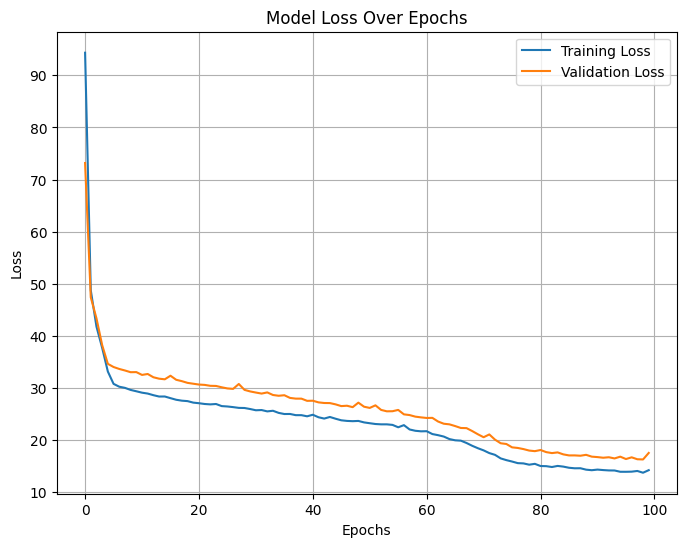

In [24]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.plot(training_results.history['loss'], label='Training Loss')
plt.plot(training_results.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [25]:
model1_evaluation = model1.evaluate(X_test, y_test)
model2_evaluation = model2.evaluate(X_test, y_test)
model3_evaluation = model3.evaluate(X_test, y_test)
model4_evaluation = model4.evaluate(X_test, y_test)
model5_evaluation = model5.evaluate(X_test, y_test)
model6_evaluation = model6.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7087.3799 - mae: 7087.3799 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7213.2734 - mae: 7213.2734 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3800.7222 - mae: 3800.7222 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3441.3127 - mae: 3441.3127 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12928.8467 - mae: 12928.8467 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.4674 


In [26]:
print("Model 1 Evaluation:", model1_evaluation)
print("Model 2 Evaluation:", model2_evaluation)
print("Model 3 Evaluation:", model3_evaluation)
print("Model 4 Evaluation:", model4_evaluation)
print("Model 5 Evaluation:", model5_evaluation)
print("Model 6 Evaluation:", model6_evaluation)

Model 1 Evaluation: [7376.83837890625, 7376.83837890625]
Model 2 Evaluation: [7516.44873046875, 7516.44873046875]
Model 3 Evaluation: [3871.716552734375, 3871.716552734375]
Model 4 Evaluation: [3604.31640625, 3604.31640625]
Model 5 Evaluation: [13277.65625, 13277.65625]
Model 6 Evaluation: 17.524377822875977
